# **BTC PRICE PREDICTION**

## Multiple Linear Regression

Import the Required Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

*Note: First, Upload the Dataset in the Google Drive and Run the Program.*

Reading the Dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Bitcoin Historical Dataset.csv")

First Five Recors of the Dataset

In [ ]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 01, 2022",46297.0,45529.0,46728.0,44261.0,632.93M,1.70%
1,"Mar 31, 2022",45525.0,47071.0,47624.0,45228.0,520.00M,-3.29%
2,"Mar 30, 2022",47075.0,47449.0,47714.0,46601.0,467.76M,-0.79%
3,"Mar 29, 2022",47449.0,47126.0,48127.0,47029.0,478.82M,0.73%
4,"Mar 28, 2022",47105.0,46859.0,48199.0,46672.0,610.27M,0.52%


Last Five Records of the Dataset

In [ ]:
dataset.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3739,"Jan 05, 2012",6.9,5.6,7.2,5.6,182.33K,24.78%
3740,"Jan 04, 2012",5.6,4.9,5.7,4.8,131.17K,14.14%
3741,"Jan 03, 2012",4.9,5.2,5.3,4.7,125.17K,-6.51%
3742,"Jan 02, 2012",5.2,5.3,5.5,4.8,69.15K,-0.95%
3743,"Jan 01, 2012",5.3,4.7,5.5,4.6,108.51K,11.65%


Dataset Shape

In [ ]:
dataset.shape

(3744, 7)

Dataset Describing

In [ ]:
dataset.describe()

,Price,Open,High,Low
count,3744.000000,3744.000000,3744.000000,3744.000000
mean,8709.264931,8696.973291,8943.827778,8423.173932
std,14951.761124,14939.928071,15353.643871,14472.255066
min,4.200000,4.200000,4.400000,3.900000
25%,276.250000,275.425000,284.500000,268.475000
50%,1044.550000,1043.150000,1068.800000,1004.500000
75%,9082.025000,9080.475000,9266.825000,8806.725000
max,67527.900000,67528.700000,68990.600000,66334.900000


Dropping Unnecessary Columns

In [ ]:
dataset = dataset.drop(['Date','Change %'],axis=1)

First Five Records of the Dataset

In [ ]:
dataset.head()

,Price,Open,High,Low,Vol.
0,46297.0,45529.0,46728.0,44261.0,632.93M
1,45525.0,47071.0,47624.0,45228.0,520.00M
2,47075.0,47449.0,47714.0,46601.0,467.76M
3,47449.0,47126.0,48127.0,47029.0,478.82M
4,47105.0,46859.0,48199.0,46672.0,610.27M


Last Five Records of the Dataset

In [ ]:
dataset.tail()

,Price,Open,High,Low,Vol.
3739,6.9,5.6,7.2,5.6,182.33K
3740,5.6,4.9,5.7,4.8,131.17K
3741,4.9,5.2,5.3,4.7,125.17K
3742,5.2,5.3,5.5,4.8,69.15K
3743,5.3,4.7,5.5,4.6,108.51K


Dataset Shape

In [ ]:
dataset.shape

(3744, 5)

Dataset Describing

In [ ]:
dataset.describe()

,Price,Open,High,Low
count,3744.000000,3744.000000,3744.000000,3744.000000
mean,8709.264931,8696.973291,8943.827778,8423.173932
std,14951.761124,14939.928071,15353.643871,14472.255066
min,4.200000,4.200000,4.400000,3.900000
25%,276.250000,275.425000,284.500000,268.475000
50%,1044.550000,1043.150000,1068.800000,1004.500000
75%,9082.025000,9080.475000,9266.825000,8806.725000
max,67527.900000,67528.700000,68990.600000,66334.900000


In [ ]:
X=dataset[['Open','Low','High']]
Y=dataset['Price']

Splitting the Dataset into Traing and Testing Set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Model Fitting

In [ ]:
bppmlr = LinearRegression()
bppmlr.fit(X_train,Y_train)

LinearRegression()

Intercepts and Coefficients

In [ ]:
print("Intercept: ", bppmlr.intercept_)
print("Coefficients:")
list(zip(X, bppmlr.coef_))

Intercept:  3.682753442300964
Coefficients:


[('Open', -0.5430728086439843),
 ('Low', 0.6454893447436105),
 ('High', 0.8933086489532557)]

In [ ]:
pred_bppmlr = bppmlr.predict(X_test)
mlr_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': pred_bppmlr})
mlr_diff.head()

,Actual value,Predicted value
825,7321.5,7332.891018
1982,682.3,685.741036
3567,6.3,9.980604
668,9527.6,9621.242607
598,11390.4,11400.837734


Metrices Calculation

In [ ]:
meanAbErr = metrics.mean_absolute_error(Y_test, pred_bppmlr)
meanSqErr = metrics.mean_squared_error(Y_test, pred_bppmlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test, pred_bppmlr))
print('R squared: {:.2f}'.format(bppmlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("Training Model Accuracy: {:.3f}%".format(bppmlr.score(X_train,Y_train)*100))

R squared: 99.96
Mean Absolute Error: 113.26661229816666
Mean Square Error: 93053.78671346133
Root Mean Square Error: 305.0471876832523
Training Model Accuracy: 99.965%


Model Accuracy

In [ ]:
print("Testing Model Accuracy: {:.3f}%".format(bppmlr.score(X_test,Y_test)*100))

Testing Model Accuracy: 99.956%


Plotting **'Open'** vs **'Price'**

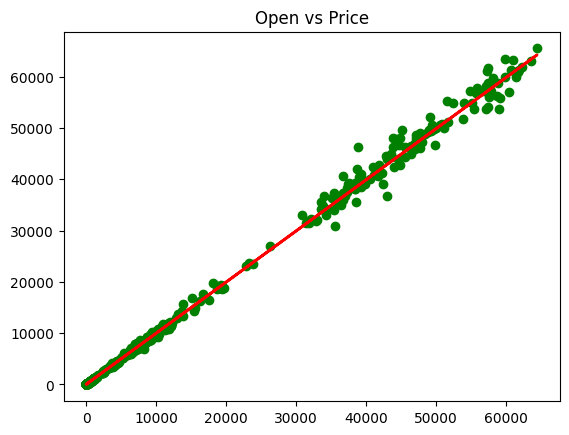

In [ ]:
x = dataset[['Open']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
open=LinearRegression()
open.fit(x_train,y_train)
open.score(x_train,y_train)
predict=open.predict(x_test)
plt.scatter(x_test,y_test,color="green")
plt.title("Open vs Price")
plt.plot(x_test,predict,color="red",linewidth=2)

Plotting **'Low'** vs **'Price'**

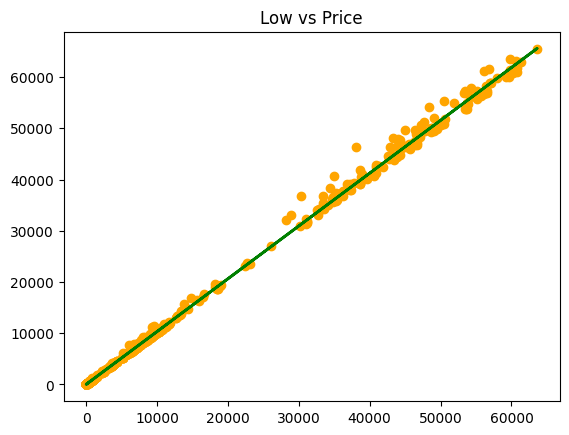

In [ ]:
x = dataset[['Low']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
low=LinearRegression()
low.fit(x_train,y_train)
low.score(x_train,y_train)
predict=low.predict(x_test)
plt.title("Low vs Price")
plt.scatter(x_test,y_test,color="orange")
plt.plot(x_test,predict,color="green",linewidth=2)

Plotting **'High'** vs **'Price'**

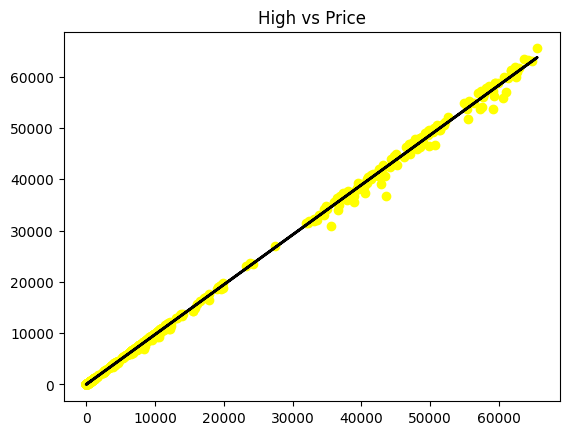

In [ ]:
x = dataset[['High']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
high=LinearRegression()
high.fit(x_train,y_train)
high.score(x_train,y_train)
predict=high.predict(x_test)
plt.title("High vs Price")
plt.scatter(x_test,y_test,color="yellow")
plt.plot(x_test,predict,color="black",linewidth=2)

Model Prediction

In [ ]:
n=int(input("Number of Inputs:"))
x_new=[]
for i in range(n):
  a=float(input("Enter the Open Price:"))
  b=float(input("Enter the Low Price:"))
  c=float(input("Enter the High Price:"))
  x_new.append([a,b,c])
y_new=bppmlr.predict(x_new)
print("Prediction of the Closing Price:",y_new)

Number of Inputs:1
Enter the Open Price:1200
Enter the Low Price:1196
Enter the High Price:1203
Prediction of the Closing Price: [1198.65094407]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Saving

In [ ]:
jl.dump(bppmlr,'Linear_Regression_BTC_Predictor.pkl')

['Linear_Regression_BTC_Predictor.pkl']

## Time Series Forecasting using ARIMA

*Structure*:

*   **Yahoo Finance API**

*   Daily Prices

*   85% Data for Training and 15% Data for Testing

*   Predicting Next Day's Bitcoin Price

*   **Machine Learning Model: ARIMA**

*ARIMA*:

***Auto Regressive Integrated Moving Average***

* **AR**: Autoregression. A Model that uses the dependent relationship between an observation and some number of lagged Observations.

* **I**: Integrated. A use of differencing of raw observations in order to make the time series stationary

* **MA**: Moving Average. A Model that uses the dependancy between an observation and a residual error from a moving average model applied to lagged Observations.

***Parameters***:

* **p**: The Number of Lag Observations included in the Model, also called as Lag Order 

* **d**: The Number of times that the raw observations differenced, also called the Degree of Differencing

* **q**: The Size of the Moving Average Window, also called the Oreder of Moving Average

Importing the Required Libraries

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Downloading the Bitcoin Historical Data from Yahoo Finance

In [ ]:
data = yf.download('BTC-USD', start = '2015-01-01', end = '2023-04-01')

[*********************100%***********************]  1 of 1 completed


First Five Records in the Dataset

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


Last Five Records in the Dataset

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,27994.068359,28037.925781,26606.689453,27139.888672,27139.888672,18188895178
2023-03-28,27132.888672,27460.718750,26677.818359,27268.130859,27268.130859,17783600385
2023-03-29,27267.031250,28619.542969,27259.662109,28348.441406,28348.441406,20684945906
2023-03-30,28350.140625,29159.902344,27720.160156,28033.562500,28033.562500,22435349951
2023-03-31,28032.261719,28639.896484,27583.714844,28478.484375,28478.484375,19001327598


Dataset Shape

In [ ]:
data.shape

(3012, 6)

Plotting the **'Adjusted Close'** vs **'Years'**

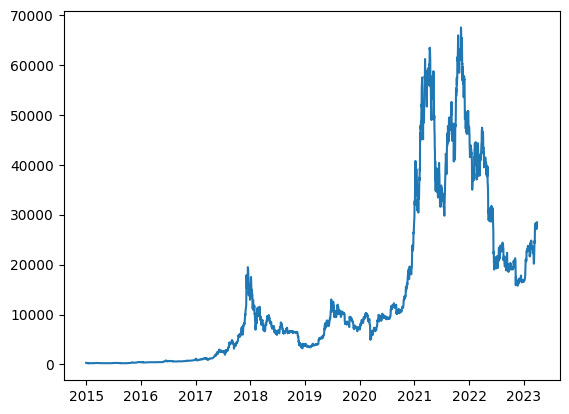

In [ ]:
plt.plot(data.index, data['Adj Close'])
plt.show()

Splitting the Dataset into Training and Testing

In [ ]:
to_row = int(len(data) * 0.85)
print(to_row)

training_data = list(data[0:to_row]['Adj Close'])
testing_data = list(data[to_row:]['Adj Close'])
print(training_data)
print(testing_data)

2560
[314.2489929199219, 315.0320129394531, 281.0820007324219, 264.19500732421875, 274.4739990234375, 286.1889953613281, 294.3370056152344, 283.3489990234375, 290.4079895019531, 274.7959899902344, 265.6600036621094, 267.7959899902344, 225.86099243164062, 178.10299682617188, 209.843994140625, 208.0970001220703, 199.25999450683594, 210.33900451660156, 214.86099243164062, 211.31500244140625, 226.89700317382812, 233.406005859375, 232.87899780273438, 247.8470001220703, 253.71800231933594, 273.4729919433594, 263.4750061035156, 233.9149932861328, 233.51300048828125, 226.4250030517578, 217.46400451660156, 226.9720001220703, 238.22900390625, 227.26800537109375, 226.85299682617188, 217.11099243164062, 222.26600646972656, 227.75399780273438, 223.41200256347656, 220.11000061035156, 219.83900451660156, 219.18499755859375, 221.76400756835938, 235.427001953125, 257.3210144042969, 234.8249969482422, 233.84300231933594, 243.61000061035156, 236.3260040283203, 240.2830047607422, 243.7790069580078, 244.53

Plotting the Splitted Dataset

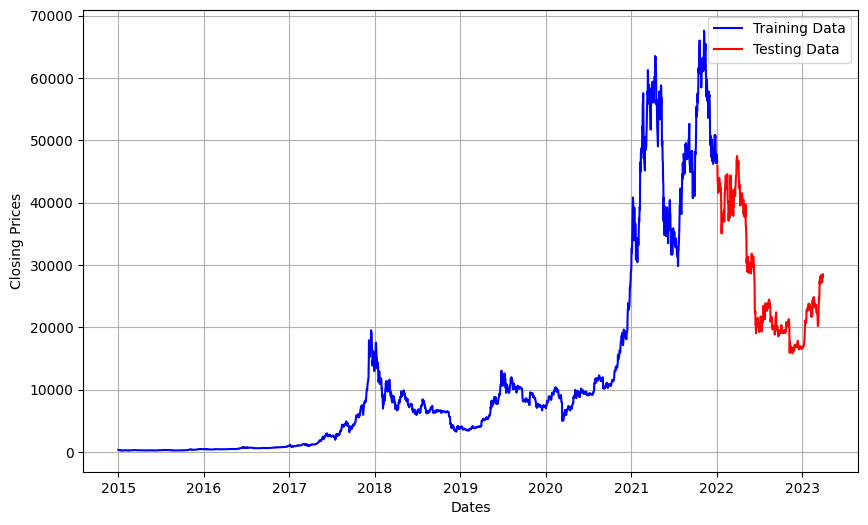

In [ ]:
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data[0:to_row]['Adj Close'], 'Blue', label = 'Training Data')
plt.plot(data[to_row:]['Adj Close'], 'Red', label = 'Testing Data')
plt.legend()
plt.show()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

Model Fitting

In [ ]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

Model Summary

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3011
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24410.540
Date:                Fri, 14 Apr 2023   AIC                          48831.079
Time:                        15:26:52   BIC                          48861.128
Sample:                             0   HQIC                         48841.886
                               - 3011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0240      0.010     -2.472      0.013      -0.043      -0.005
ar.L2          0.0059      0.009      0.632      0.527      -0.012       0.024
ar.L3          0.0208      0.010      2.085      0.0

Plotting the Predicted and Actual BTC Price

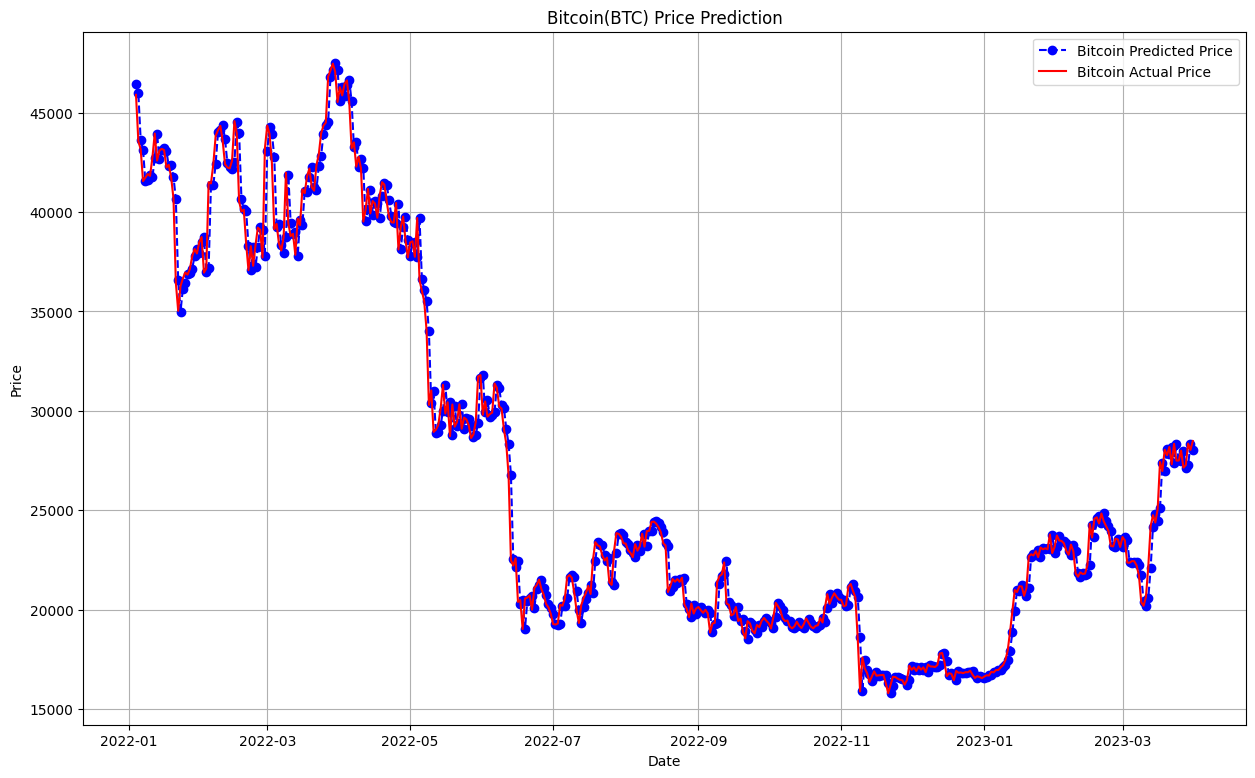

In [ ]:
plt.figure(figsize = (15, 9))
plt.grid()
date_range = data[to_row:].index
plt.plot(date_range, model_predictions, color = 'Blue', marker = 'o', linestyle = 'dashed', label = 'Bitcoin Predicted Price')
plt.plot(date_range, testing_data, color = 'Red', label = 'Bitcoin Actual Price')
plt.title('Bitcoin(BTC) Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Model Accuracy using MAPE

In [ ]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print(f"Mean Absolute Percentage Error(MAPE): {mape}")
print(f"MAPE(%): {mape*100}",)

Mean Absolute Percentage Error(MAPE): 0.022323599507192482
MAPE(%): 2.232359950719248


***If the Model's MAPE Percentage is less than 10% the its a Highly Accurate or Excellent Model for Prediction. Its MAPE Value is 2.84%, so it is an Excellent Model for Prediction. Its Accuracy will be greater than or equal to 97.7%***

Model Saving

In [ ]:
jl.dump(model_fit,'ARIMA_BTC_Predictor.pkl')

['ARIMA_BTC_Predictor.pkl']